In [26]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import scipy.stats as stats

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as tck

import pandas as pd
import pickle

In [27]:
filename = r"C:\Users\Student\OneDrive\MSci project\MSci2022_TESS\Transit_fitting\WASP_17b\batman_model\sector_12_and_sector_38\WASP_17b_residuals_batman_w_flux.p"

with open(filename, "rb") as f:
    t, WASP_17b_residuals_batman_w_flux = pickle.load(f)
f.close()

In [28]:
filename = r"C:\Users\Student\OneDrive\MSci project\MSci2022_TESS\Transit_fitting\WASP_17b\gp_batman_model\WASP_17b_residuals_gp_batman_w_flux.p"

with open(filename, "rb") as f:
    t, WASP_17b_residuals_gp_batman_w_flux = pickle.load(f)
f.close()

In [29]:
filename = r"C:\Users\Student\OneDrive\MSci project\MSci2022_TESS\Transit_fitting\WASP_17b\gp_batman_model\WASP_17b_residuals_batman_w_detrendedflux.p"

with open(filename, "rb") as f:
    t, WASP_17b_residuals_batman_w_detrendedflux = pickle.load(f)
f.close()

In [30]:
residuals_batman_w_flux_mean = np.mean(WASP_17b_residuals_batman_w_flux)
residuals_batman_w_flux_sigma = np.std(WASP_17b_residuals_batman_w_flux)

residuals_gp_batman_w_flux_mean = np.mean(WASP_17b_residuals_gp_batman_w_flux)
residuals_gp_batman_w_flux_sigma = np.std(WASP_17b_residuals_gp_batman_w_flux)

residuals_batman_w_detrendedflux_mean = np.mean(WASP_17b_residuals_batman_w_detrendedflux)
residuals_batman_w_detrendedflux_sigma = np.std(WASP_17b_residuals_batman_w_detrendedflux)

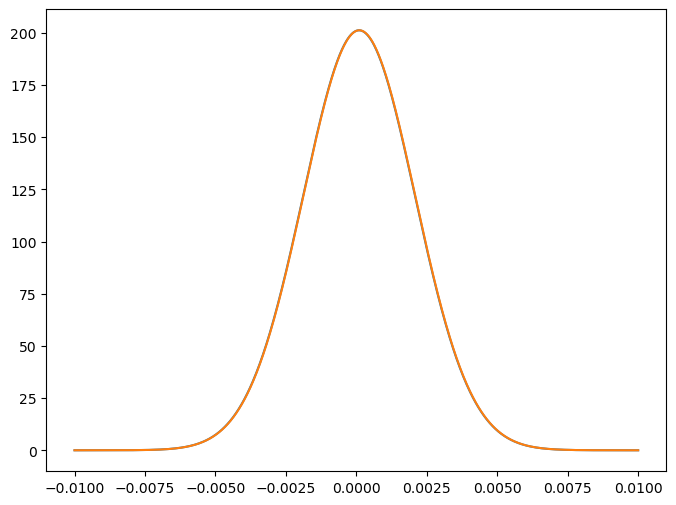

In [35]:
x = np.linspace(-0.01, 0.01, 1000)
labels = ["physical", "physical + gp", "detrended"]

fontsize = 15

fig, ax = plt.subplots(1, figsize=(8,6))

ax.plot(x, stats.norm.pdf(x, residuals_batman_w_flux_mean, residuals_batman_w_flux_sigma), label="physical")

ax.plot(x, stats.norm.pdf(x, residuals_gp_batman_w_flux_mean, residuals_gp_batman_w_flux_sigma), label="physical + gp")

# ax.plot(x, stats.norm.pdf(x, residuals_batman_w_detrendedflux_mean, residuals_batman_w_detrendedflux_sigma), label="detrended")

plt.show()

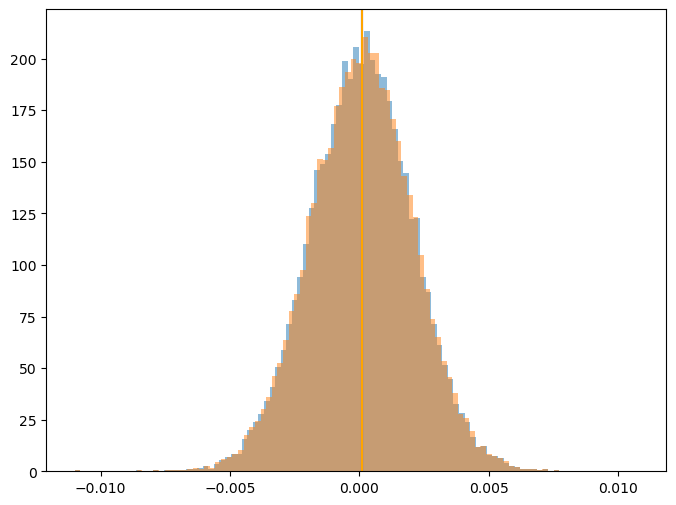

In [38]:
fig, ax = plt.subplots(1, figsize=(8,6))
nbin = 100

plt.hist(WASP_17b_residuals_batman_w_flux, density=True, bins=nbin, alpha=0.5)
plt.axvline(residuals_batman_w_flux_mean, color="blue")
plt.hist(WASP_17b_residuals_gp_batman_w_flux, density=True, bins=nbin, alpha=0.5)
plt.axvline(residuals_gp_batman_w_flux_mean, color="orange")

plt.show()